In [206]:
# pandas project

In [1]:
import pandas as pd 
import seaborn as sns
import numpy as np
import re

In [2]:
sharks = pd.read_csv('/Users/jaimevazquez/Downloads/attacks.csv', encoding = 'cp1252')

In [8]:
df_sharks = pd.DataFrame(sharks)

In [6]:
pd.set_option('display.max_columns', None)

In [7]:
df_sharks

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df_sharks.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [10]:
df_sharks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

In [128]:
# Columns drop + na drop

In [129]:
df_sharks1 = df_sharks.dropna(subset = ['Age','Activity','Fatal (Y/N)','Country', 'Sex ','Species ','Investigator or Source'])

In [ ]:
# Column drop

In [133]:
df_sharks1[['Activity','Fatal (Y/N)','Country', 'Sex ','Species ','Investigator or Source']]

,Activity,Fatal (Y/N),Country,Sex,Species,Investigator or Source
0,Paddling,N,USA,F,White shark,"R. Collier, GSAF"
6,Swimming,Y,BRAZIL,M,Tiger shark,"Diario de Pernambuco, 6/4/2018"
7,Fishing,N,USA,M,"Lemon shark, 3'","K. McMurray, TrackingSharks.com"
8,Walking,N,USA,M,"Bull shark, 6'","K.McMurray, TrackingSharks.com"
10,Feeding sharks,N,AUSTRALIA,M,Grey reef shark,"ABC.net.au ,05/24/2018"
...,...,...,...,...,...,...
6239,Skindiving,N,MOZAMBIQUE,M,"""A pack of sharks""",L. Bishop; V.M. Coppleson (1962)
6242,Swimming naked near a date palm where many dat...,N,IRAQ,M,Bull shark,B.W. Coad & L.A.J. Al-Hassan
6243,Swimming in section of river used for washing ...,N,IRAQ,M,Bull shark,B.W. Coad & L.A.J. Al-Hassan
6265,Swimming,Y,IRAQ,M,Bull shark,B.W. Coad & L.A.J. Al-Hassan


In [134]:
df_sharks1.rename(columns= {'Sex ': 'Sex'}, inplace = True)

/usr/local/lib/python3.8/site-packages/pandas/core/frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [135]:
df_sharks1.rename(columns= {'Species ': 'Species'}, inplace = True)

In [136]:
df_sharks1.rename(columns= {'Fatal (Y/N)': 'Fatal'}, inplace = True)

In [137]:
df_sharks1.rename(columns= {'Investigator or Source': 'Source'}, inplace = True)

In [138]:
# duplicates drop

In [139]:
df_sharks1.drop_duplicates(subset=['Activity','Fatal','Country', 'Sex','Species','Source'])

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species,Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
6,2018.06.03.a,03-Jun-2018,2018.0,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,M,18,FATAL,Y,Late afternoon,Tiger shark,"Diario de Pernambuco, 6/4/2018",2018.06.03.a-daSilva.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.a,2018.06.03.a,6297.0,NaN,NaN
7,2018.05.27,27-May-2018,2018.0,Unprovoked,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,male,M,52,Minor injury to foot. PROVOKED INCIDENT,N,NaN,"Lemon shark, 3'","K. McMurray, TrackingSharks.com",2018.05.27-Ponce.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.27,2018.05.27,6296.0,NaN,NaN
8,2018.05.26.b,26-May-2018,2018.0,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",Walking,Cody High,M,15,Lower left leg bitten,N,17h00,"Bull shark, 6'","K.McMurray, TrackingSharks.com",2018.05.26.b-High.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.26.b,2018.05.26.b,6295.0,NaN,NaN
10,2018.05.24,24-May-2018,2018.0,Provoked,AUSTRALIA,Queensland,Cairns Aquarium,Feeding sharks,male,M,32,Minor bite to hand by captive shark. PROVOKED ...,N,Morning,Grey reef shark,"ABC.net.au ,05/24/2018",2018.05.24-CairnsAquarium.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.24,2018.05.24,6293.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6239,ND.0068,Before 1962,0.0,Unprovoked,MOZAMBIQUE,Maputo Province,Santa Maria Peninsula,Skindiving,Les Bishop,M,36,Bumped by sharks,N,NaN,"""A pack of sharks""",L. Bishop; V.M. Coppleson (1962),ND-0068-LesBishop.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0068,ND.0068,64.0,NaN,NaN
6242,ND.0064,1960s,0.0,Unprovoked,IRAQ,Basrah,Shatt-al-Arab River,Swimming naked near a date palm where many dat...,male,M,6,Arm severed,N,Afternoon,Bull shark,B.W. Coad & L.A.J. Al-Hassan,ND-0064-Shatt-al-Arab.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0064,ND.0064,61.0,NaN,NaN
6243,ND.0063,1960s,0.0,Unprovoked,IRAQ,Basrah,Shatt-al-Arab River near Abu al Khasib,Swimming in section of river used for washing ...,male,M,16,Right leg lacerated & surgically amputated,N,Afternoon,Bull shark,B.W. Coad & L.A.J. Al-Hassan,ND-0063-Shatt-al-Arab.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0063,ND.0063,60.0,NaN,NaN
6265,ND.0038,1941-1942,0.0,Unprovoked,IRAQ,Basrah,Shatt-el Arab River near a small boat stand,Swimming,male,M,13 or 14,"FATAL, left leg bitten with severe blood loss",Y,Afternoon,Bull shark,B.W. Coad & L.A.J. Al-Hassan,ND-0038-Shatt-al-Arab.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0038,ND.0038,38.0,NaN,NaN


In [140]:
# Countries with the most accidents
df_sharks1.Country.value_counts()

USA                               833
AUSTRALIA                         438
SOUTH AFRICA                      246
BAHAMAS                            46
NEW ZEALAND                        33
                                 ... 
FEDERATED STATES OF MICRONESIA      1
BRITISH WEST INDIES                 1
IRAN                                1
NORWAY                              1
NORTH PACIFIC OCEAN                 1
Name: Country, Length: 95, dtype: int64

In [ ]:
# categorize by country (USA)

In [159]:
USA = df_sharks1[df_sharks1['Country'] == 'USA']
USA.sample(5)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species,Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
2041,2000.07.04.a,04-Jul-2000,2000.0,Unprovoked,USA,Florida,"Artifical reef 3 miles off Manatee Beach, Mana...","Spearfishing, holding mesh bag with speared fish",Beverly Comstock,F,55,Lower right calf lacerated,N,12h00,"Nurse shark, 1.2 m [4']","V. Mannix, Bradenton Herald, 8/3/2000, p.1",2000.07.04.a-Comstock.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2000.07.04.a,2000.07.04.a,4262.0,NaN,NaN
75,2017.10.05,05-Oct-2017,2017.0,Unprovoked,USA,Hawaii,"Kama‘ole Beach Park, Maui",Snorkeling,female,F,40,Abrasions,N,12h30,8' shark,"Maui Now, 10/5/2017",2017.10.05-Hawaii.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.10.05,2017.10.05,6228.0,NaN,NaN
1457,2006.07.17,17-Jul-2006,2006.0,Unprovoked,USA,South Carolina,"Singleton Beach, Hilton Head Island, Beaufort ...",Standing,Dallas Jackson,M,49,Left ankle & foot bitten,N,10h00,"Angel shark, 1.2m","C. Creswell, GSAF",2006.07.17.a-DallasJackson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2006.07.17,2006.07.17,4846.0,NaN,NaN
1341,2007.08.25,25-Aug-2007,2007.0,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Taylor Smith,M,27,6 lacerations to left hand,N,Morning,3' shark,"S. Petersohn, GSAF; WESH 2 News",2007.08.25-Smith.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2007.08.25,2007.08.25,4962.0,NaN,NaN
3167,1976.10.18,18-Oct-1976,1976.0,Unprovoked,USA,California,"Moonstone Beach, Humboldt County",Surfing,William Kennedy,M,25,Leg bitten,N,14h30,"White shark, 3 m to 4 m [10' to 13']","D. Miller & R. Collier, R. Collier, pp.70-71; ...",1976.10.18-Kennedy_Collier.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1976.10.18,1976.10.18,3136.0,NaN,NaN


<AxesSubplot:xlabel='Sex', ylabel='count'>

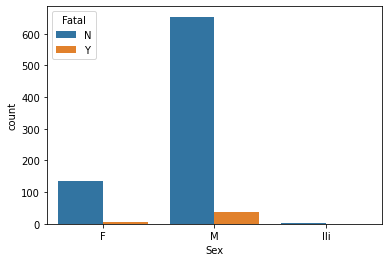

In [155]:
# Which gender dies the most
sns.countplot(x= USA.Sex, hue= USA.Fatal)

In [141]:
# Which activities cause more accidents
df_sharks1.Activity.value_counts()

Surfing                                                                 478
Swimming                                                                257
Spearfishing                                                            163
Fishing                                                                  77
Wading                                                                   63
                                                                       ... 
Playing soccer in the water                                               1
Surf fishing in waist-deep water                                          1
Swimming naked near a date palm where many dates fell into the water      1
Dived into the water                                                      1
Attempting to rescue an injured & beached shark                           1
Name: Activity, Length: 479, dtype: int64

In [200]:
# Categorize by surfing activity
Surfing = df_sharks1[df_sharks1['Activity'] == 'Surfing']
Surfing.sample(5)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species,Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
2592,1991.07.01.a,01-Jul-1991,1991.0,Unprovoked,USA,California,"8.5 miles south of Ano Nuevo State Reserve, Da...",Surfing,Eric Larsen,M,32,"Forearm, upper thigh, knee & ankle lacerated",N,09h30,5 m [16.5'] white shark,"R. Collier, pp.124-126 ; San Jose Mercury, 7/4...",1991.07.01.a-Larsen_Collier.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1991.07.01.a,1991.07.01.a,3711.0,NaN,NaN
2748,1988.02.14,14-Feb-1988,1988.0,Unprovoked,SOUTH AFRICA,Eastern Cape Province,Nahoon,Surfing,Michael Schaeffer,M,20,Ankle bitten,N,17h00,"1 m ""grey-colored"" shark","M. Schaeffer, M. Levine, GSAF",1988.02.14-Schaeffer.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1988.02.14,1988.02.14,3555.0,NaN,NaN
1681,2004.04.05,05-Apr-2004,2004.0,Unprovoked,SOUTH AFRICA,Western Cape Province,"Surfers' Corner, Muizenberg, False Bay",Surfing,J.P. Andrew,M,16,"Left leg lacerated, right leg severed above th...",N,14h00,5 m [16.5'] white shark,"L. Compagno & E. Ritter, GSAF",2004.04.05-JP-Andrew.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2004.04.05,2004.04.05,4622.0,NaN,NaN
2533,1992.09.13,13-Sep-1992,1992.0,Unprovoked,USA,Oregon,"Gold Beach, Curry County",Surfing,Jerad Brittain,M,20,Minor bruises,N,17h00,4 m to 5 m [13' to 16.5'] white shark,"R. Collier, pp.134-135",1992.09.13-Brittain_Collier.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1992.09.13,1992.09.13,3770.0,NaN,NaN
792,2012.05.23,23-May-2012,2012.0,Unprovoked,USA,Florida,"Jacksonville, Duval County",Surfing,Chad Refro,M,22,Lacerations to foot,N,15h00,4' to 5' shark,"First Coast News, 5/24/2012",2012.05.23-Renfro.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2012.05.23,2012.05.23,5511.0,NaN,NaN


[Text(0, 0, 'AUSTRALIA'),
 Text(1, 0, 'SOUTH AFRICA'),
 Text(2, 0, 'BRAZIL'),
 Text(3, 0, 'USA'),
 Text(4, 0, 'INDONESIA'),
 Text(5, 0, 'REUNION'),
 Text(6, 0, 'NEW ZEALAND'),
 Text(7, 0, 'ECUADOR'),
 Text(8, 0, 'SCOTLAND'),
 Text(9, 0, 'FRENCH POLYNESIA'),
 Text(10, 0, 'MEXICO'),
 Text(11, 0, 'NEW CALEDONIA'),
 Text(12, 0, 'FIJI'),
 Text(13, 0, 'URUGUAY'),
 Text(14, 0, 'VENEZUELA'),
 Text(15, 0, 'OKINAWA'),
 Text(16, 0, 'MOZAMBIQUE')]

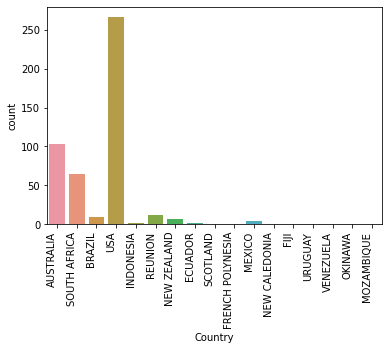

In [196]:
# Surfing accidents by country
c = sns.countplot(x= Surfing.Country)
c.set_xticklabels(c.get_xticklabels(), rotation=90, ha="right")

In [142]:
# What shark species is attacking the most
df_sharks1.Species.value_counts()

White shark                                    94
Tiger shark                                    44
Bull shark                                     38
4' shark                                       36
1.8 m [6'] shark                               28
                                               ..
Raggedtooth shark, 1.5 to 2 m [5' to 6.75']     1
2 to 3 m shark                                  1
Dusky shark, 2m                                 1
3' to 3.5' shark                                1
 reef shark, 1.8m                               1
Name: Species, Length: 1033, dtype: int64

In [202]:
# categorize by white shark species

In [203]:
wshark = df_sharks1[df_sharks1['Species'] == 'White shark']
wshark.sample(5)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species,Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
2286,1996.09.01.a,01-Sep-1996,1996.0,Provoked,SOUTH AFRICA,KwaZulu-Natal,Hibberdene,Spearfishing,Gyula Plaganyi,M,29,No injury PROVOKED INCIDENT,N,07h19,White shark,"A. Gifford, GSAF",1996.09.01.a-Plaganyi.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1996.09.01.a,1996.09.01.a,4017.0,NaN,NaN
2210,1997.12.28.b,28-Dec-1997,1997.0,Unprovoked,SOUTH AFRICA,Western Cape Province,"Pringle Bay, 44 miles southeast of Cape Town",Spearfishing,Ian James Hill,M,39,FATAL,Y,14h00,White shark,"A. Gifford, GSAF",1997.12.28.b-Hill.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1997.12.28.b,1997.12.28.b,4093.0,NaN,NaN
797,2012.05.06,06-May-2012,2012.0,Unprovoked,USA,California,Off Catalina Island,Paddle boarding,Rose McKereghan,F,15,"No injury, shark bit paddleboard",N,07h20,White shark,"R. Collier, A. Brenneka",2012.05.06-McKereghan.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2012.05.06,2012.05.06,5506.0,NaN,NaN
972,2010.10.30,30-Oct-2010,2010.0,Unprovoked,AUSTRALIA,Western Australia,Off Garden Island,Snorkeling,Elyse Frankcom,F,20,Torso and left buttock bitten,N,12h30,White shark,"Perth Now, 10/30/2010",2010.10.30-Francom.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2010.10.30,2010.10.30,5331.0,NaN,NaN
918,2011.05.29,29-May-2011,2011.0,Unprovoked,SOUTH AFRICA,Western Cape Province,Robberg Beach,Surfing,Clinton Nelson,M,33,"No injury, board bumped by shark",N,NaN,White shark,"The George Herald, 5/30/2011",2011.05.29-Nelson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2011.05.29,2011.05.29,5385.0,NaN,NaN


In [204]:
# Where is the white shark attacking the most

[Text(0, 0, 'USA'),
 Text(1, 0, 'SOUTH AFRICA'),
 Text(2, 0, 'AUSTRALIA'),
 Text(3, 0, 'NEW ZEALAND'),
 Text(4, 0, 'OKINAWA'),
 Text(5, 0, 'MEXICO'),
 Text(6, 0, 'CROATIA'),
 Text(7, 0, 'ITALY'),
 Text(8, 0, 'PAPUA NEW GUINEA'),
 Text(9, 0, 'MALTA'),
 Text(10, 0, 'GREECE')]

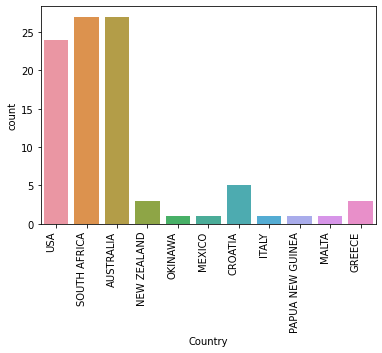

In [205]:
w = sns.countplot(x= wshark.Country)
w.set_xticklabels(w.get_xticklabels(), rotation=90, ha="right")